### This script trains a CNN model to classify "Sign Language MNIST" dataset.

In [1]:
# Load packages/modules
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os

### Download dataset from "https://www.kaggle.com/datamunge/sign-language-mnist"

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',') 
        next(reader)
        temp_labels = []
        temp_images = []
        
        for row in reader:
            label = row[0]
            image = row[1:785]
            image = np.array_split(image,28)
            temp_labels.append(label)
            temp_images.append(image)
        
        images = np.array(temp_images).astype(float)
        labels = np.array(temp_labels).astype(float)                   
    return images, labels

# Change base directory (where you save the downloaded folder)
base_dir = "/Users/jimmy/Downloads/3258_5337_bundle_archive"

path_sign_mnist_train = os.path.join(base_dir,"sign_mnist_train.csv")
path_sign_mnist_test = os.path.join(base_dir,"sign_mnist_test.csv")

# Extract data from csv
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print('Training images shape:',training_images.shape)
print('Training labels shape:',training_labels.shape)
print('Testing images shape:',testing_images.shape)
print('Testing labels shape:',testing_labels.shape)

Training images shape: (27455, 28, 28)
Training labels shape: (27455,)
Testing images shape: (7172, 28, 28)
Testing labels shape: (7172,)


In [3]:
training_images = np.expand_dims(training_images,3)
testing_images = np.expand_dims(testing_images,3)

# Create ImageDataGenerator for training data with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    horizontal_flip=True   
    )

# Create ImageDataGenerator for testing data
validation_datagen = ImageDataGenerator(
    rescale=1/255)
    
print('Training images shape:',training_images.shape)
print('Testing images shape:',testing_images.shape) 

Training images shape: (27455, 28, 28, 1)
Testing images shape: (7172, 28, 28, 1)


In [4]:
# Define the model
model = tf.keras.models.Sequential([
    # The first 2D convolution with MaxPooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second 2D convolution with MaxPooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third 2D convolution with MaxPooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results 
    tf.keras.layers.Flatten(),
    # DNN with 512 neurons
    tf.keras.layers.Dense(512, activation='relu'),
    # DNN with 512 neurons
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                     batch_size=32)
validation_generator = validation_datagen.flow(testing_images,
                                               testing_labels,
                                               batch_size=32)
# Train the Model
history = model.fit_generator(train_generator,
                              epochs= 10,
                              validation_data=validation_generator)

model.evaluate(testing_images, testing_labels, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
858/858 [==============================] - 39s 45ms/step - loss: 2.7034 - accuracy: 0.1616 - val_loss: 2.0314 - val_accuracy: 0.3204
Epoch 2/10
858/858 [==============================] - 38s 44ms/step - loss: 1.8893 - accuracy: 0.3856 - val_loss: 1.4520 - val_accuracy: 0.4834
Epoch 3/10
858/858 [==============================] - 44s 51ms/step - loss: 1.5038 - accuracy: 0.4973 - val_loss: 1.1771 - val_accuracy: 0.6088
Epoch 4/10
858/858 [==============================] - 41s 48ms/step - loss: 1.2745 - accuracy: 0.5729 - val_loss: 0.8786 - val_accuracy: 0.6697
Epoch 5/10
858/858 [==============================] - 40s 46ms/step - loss: 1.1325 - accuracy: 0.6165 - val_loss: 0.7564 - val_accuracy: 0.7309
Epoch 6/10
858/858 [==============================] - 39s 45ms/step - loss: 1.0068 - accuracy: 0.6552 - val_loss: 0.6733 - val_accuracy: 0.7596
Epoch 7/10
858/858 [==============================] - 44s 52

[258.8774108886719, 0.5778025388717651]

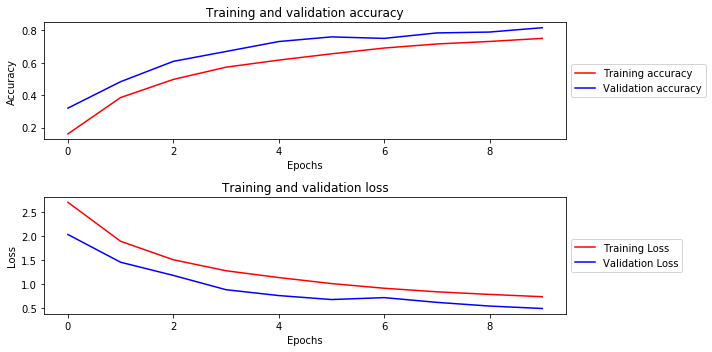

In [5]:
# Plot images
import matplotlib.pyplot as plt
%matplotlib inline

#-----------------------------------------------------------
# Get the metrices of performance (accuracy & loss)
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

#----------------------------------------------------------
# Plot training and validation accuracy per epoch
#----------------------------------------------------------
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(2,1,2)
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

plt.tight_layout()